# RU-based ODE fit and Rmax projection, structure-amount conversion factor
### plan:
The point of this sheet is to take raw monovalent data and the Rstruct values from structure-binding sensorgrams of each monovalent condition and estimate Rmax for each. Rmax should depend on Rstruct, so here we assemble a standard curve
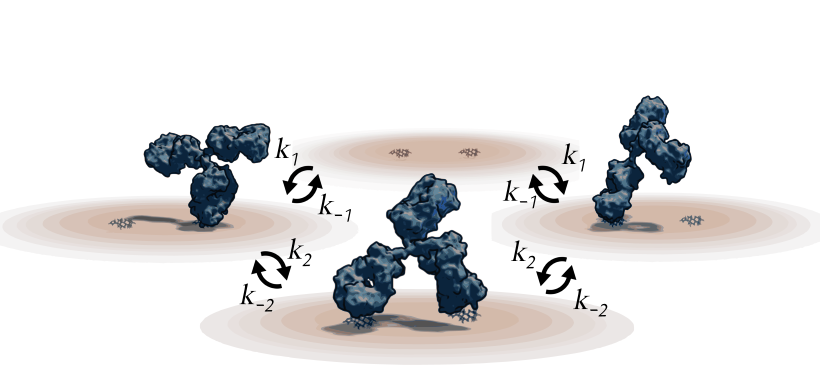

$R_{AB} = C_1 [S_{AB}]$ where $C_1$ is a conversion factor

### RU-based ODE model:


In [5]:
%matplotlib inline
import numpy as np
import cleaning_lib as clean
import os
import imp
import scipy.optimize as opt
import ipdb
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy import stats
import matplotlib.cm as cm
from tqdm import tqdm

### ODE model fitting ###
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})



In [22]:
# ### USER PARAMETERS ###
master_name = "mouse_IgGdig"

# mono_data_source = "IgG1_DIG_Mono"

# run_list_biv = np.array([    
#     ['IgG1_DIG_2nm', 'bivalent_close', 2],
#     ['IgG1_DIG_2point4nm', 'bivalent_close', 2.4],
#     ['IgG1_DIG_3point4nm', 'bivalent_close', 3.4],
#     ['IgG1_DIG_6point8nm', 'bivalent_close', 6.8],
#     ['IgG1_DIG_14point28nm', 'bivalent_close', 14.28],
#     ['IgG1_DIG_15point82nm', 'bivalent_close', 15.82],
#     ['IgG1_DIG_16point74nm_2', 'bivalent_close', 16.74],
#     ['IgG1_DIG_21nm_2', 'bivalent_close', 21.2],
#     ['IgG1_DIG_28nm', 'bivalent_close', 28],
# ])

# bivalent_data_source = run_list_biv[4]

mono_data_sources = ["Dig_Mouse_0nm_repeat1_Ab"  ,
                       "Dig_Mouse_0nm_repeat2_Ab"  ,
#                        "Dig_Mouse_21nm_repeat1_Ab_div2"  ,
#                        "Dig_Mouse_21nm_repeat2_Ab_div2"  ,
                       "Dig_Mouse_28nm_repeat1_Ab_div2"  ,
                       "Dig_Mouse_28nm_repeat2_Ab_div2"  ,
]
struct_data_sources= ["Dig_Mouse_0nm_repeat1_struct",
                    "Dig_Mouse_0nm_repeat2_struct",
#                     "Dig_Mouse_21nm_repeat1_struct",
#                     "Dig_Mouse_21nm_repeat2_struct",
                    "Dig_Mouse_28nm_repeat1_struct",  
                     "Dig_Mouse_28nm_repeat2_struct",  
]

# monovalent ODE fits for several monovalent conditions and structure binding correlation

### getting the initial guess for the monovalent rates

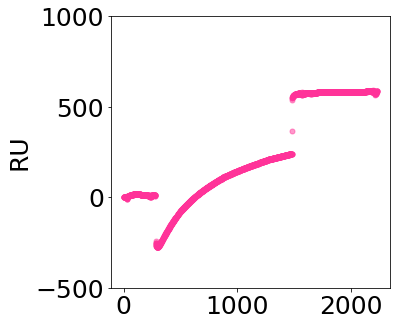

('R_{struct}', 559.4098160259022)


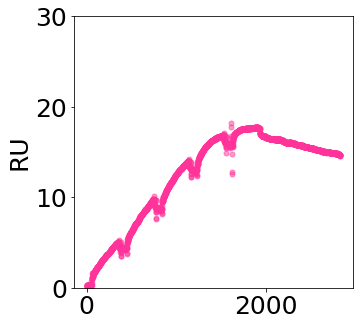

100%|██████████| 11/11 [00:00<00:00, 67.67it/s]


('projected Rmax: ', 17.047831712026195, ' Measure Rstruct: ', 559.4098160259022)
2834


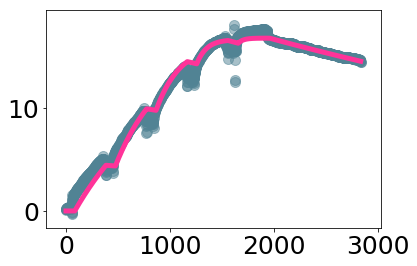

('parameters: k_{1}, k_{-1}, xi_{*}', array([0.04168364, 0.00016321, 0.03047467]))


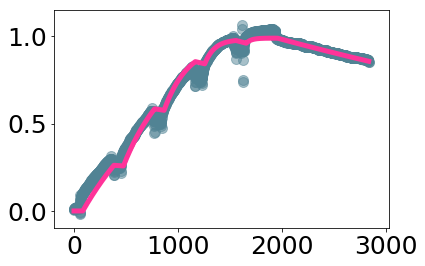

100%|██████████| 2/2 [00:00<00:00,  7.66it/s]


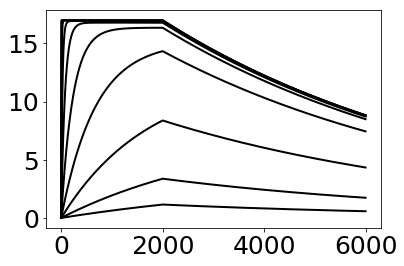

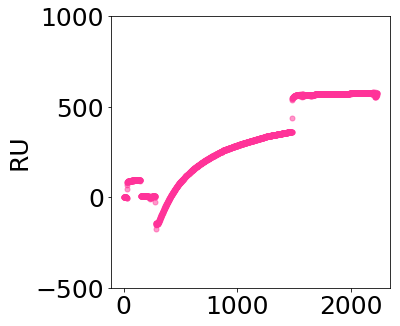

('R_{struct}', 506.19332192503623)


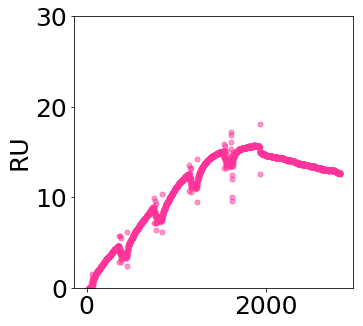

100%|██████████| 11/11 [00:00<00:00, 110.29it/s]


('projected Rmax: ', 15.12600394901931, ' Measure Rstruct: ', 506.19332192503623)
2834


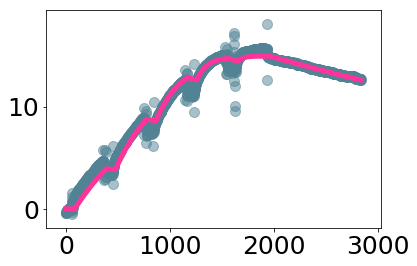

('parameters: k_{1}, k_{-1}, xi_{*}', array([0.04148205, 0.00019346, 0.02988187]))


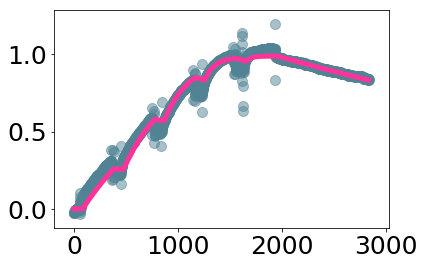

100%|██████████| 2/2 [00:00<00:00,  7.22it/s]


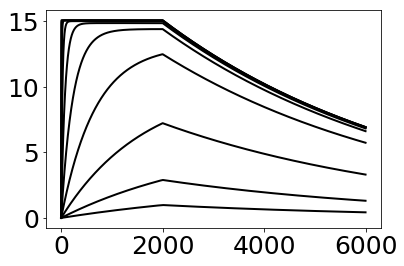

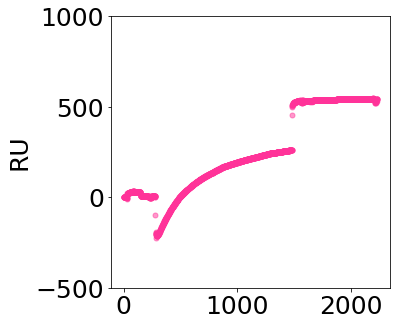

('R_{struct}', 510.7019829302144)


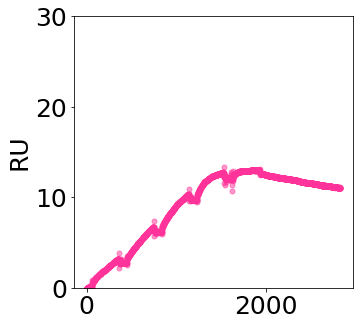

100%|██████████| 11/11 [00:00<00:00, 85.42it/s]


('projected Rmax: ', 12.756666372476934, ' Measure Rstruct: ', 510.7019829302144)
2833


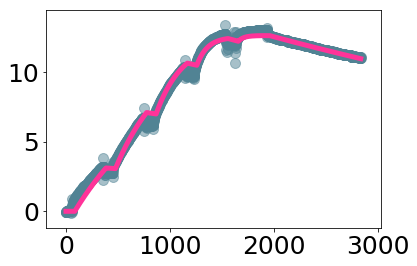

('parameters: k_{1}, k_{-1}, xi_{*}', array([0.03839399, 0.00016001, 0.02497869]))


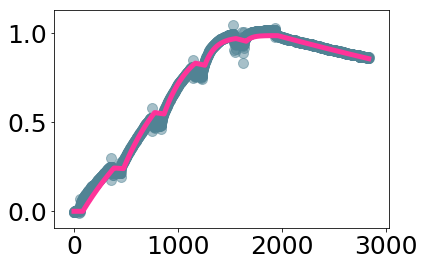

100%|██████████| 2/2 [00:00<00:00,  8.35it/s]


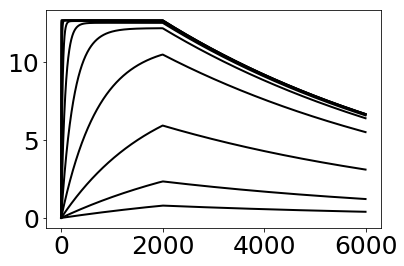

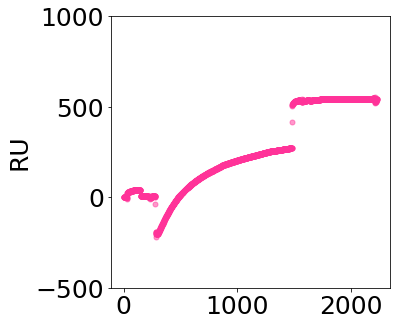

('R_{struct}', 509.54325595017576)


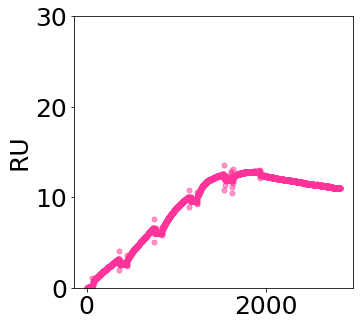

100%|██████████| 11/11 [00:00<00:00, 80.44it/s] 


('projected Rmax: ', 12.574367952895763, ' Measure Rstruct: ', 509.54325595017576)
2833


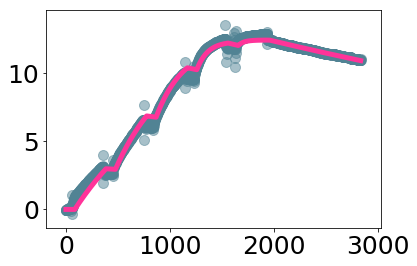

('parameters: k_{1}, k_{-1}, xi_{*}', array([0.03717249, 0.00014686, 0.02467772]))


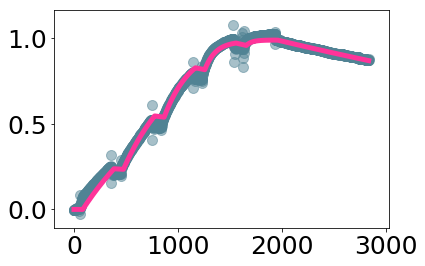

100%|██████████| 2/2 [00:00<00:00,  8.34it/s]


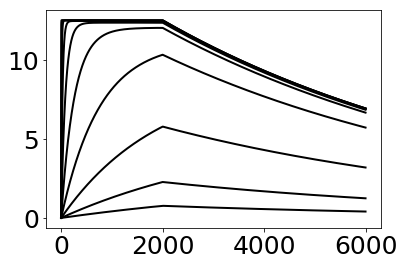

In [23]:
imp.reload(clean)
R_maxs = np.zeros((len(struct_data_sources)))
R_structs = np.zeros((len(struct_data_sources)))
for dataset in range(0,len(struct_data_sources)):
    output_directory = master_name+"/output_monofits_Rmax"
    if not os.path.exists(output_directory):
                os.makedirs(output_directory)

    struct_data_source   =struct_data_sources[dataset] 

    plt.figure(figsize=(5,5))
    struct_run = list(pd.read_csv('data_directory/mouseIgG_dig_MONO/'+struct_data_source+".txt", sep="\t", header=None)[0])
    # plt.subplot(521)
    plt.scatter(range(0, len(struct_run)), struct_run, alpha = 0.5, s = 25, c = "#ff3399")
    plt.ylabel("RU")
    plt.ylim(-500,1000)
    plt.savefig(output_directory+"/ raw_"+master_name+"_monoplota"+str(dataset)+".svg")
    plt.show()

#     Rstruct = np.mean(struct_run[-750:-50])-np.min(struct_run[250:-400])#np.mean(struct_run[0:250])
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(0,750),struct_run[-750:])
#     Rstruct = intercept
    Rstruct = intercept-np.mean(struct_run[0:200])
    print("R_{struct}",Rstruct)
    R_structs[dataset] = Rstruct


    xi_Star = 0.001
    mono_data_source = mono_data_sources[dataset]

    output_directory = master_name+"/OUTPUT_rawsprplots"
    if not os.path.exists(output_directory):
                os.makedirs(output_directory)

    plt.figure(figsize=(5,5))
    mono_run = list(pd.read_csv('data_directory/mouseIgG_dig_MONO/'+mono_data_source+".txt", sep="\t", header=None)[0])
    plt.scatter(range(0, len(mono_run)), mono_run, alpha = 0.5, s = 25, c = "#ff3399")
    plt.ylabel("RU")
    plt.ylim(0,30)
    plt.savefig(output_directory+"/ raw_"+master_name+"_monoplotb"+str(dataset)+".svg")
    plt.show()


    output_directory = master_name+"/RU_monovalent_fitting"
    if not os.path.exists(output_directory):
                os.makedirs(output_directory)
    if not os.path.exists(master_name+"/pickle_directory"):
                os.makedirs(master_name+"/pickle_directory")

    # scaling_constant = 20.19
    time_points = np.array([0, 84, 384, 475, 775, 866, 1166, 1257, 1557, 1656, 1956])
    concentrations = np.array([0, 0.025, 0, 0.05, 0, 0.1, 0, 0.25, 0, 0.5, 0]) # nM
    run_data_mono = clean.fetch_data_raw('data_directory/mouseIgG_dig_MONO/' + mono_data_source+".txt")
    t1 = np.arange(time_points[1], time_points[2])
    t2 = np.arange(time_points[-1], len(run_data_mono)-1)

    run_data1 = run_data_mono[time_points[1]:time_points[2]]
    run_data2 = run_data_mono[time_points[-1]:-1]

    k_on_g, k_off_g = clean.avg_slope_guess(time_points, concentrations,run_data_mono)
    k1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(t1[0:300], run_data1[0:300])
    popt, pcov = opt.curve_fit(clean.exponential_decay_fit, t2, run_data2,p0=(1, 1e-6, 1), maxfev=1000000)

#     plt.rc('xtick', labelsize=25) 
#     plt.rc('ytick', labelsize=25) 
#     plt.rcParams.update({'font.size': 25})

#     plt.tight_layout()

#     plt.figure(figsize=(20,7))
#     plt.subplots_adjust(left=None, bottom=None, right=None, top=0.78, wspace=.1, hspace=None)
#     plt.subplot(121)
#     plt.scatter(t1,run_data1, alpha = 0.5, s = 500, c = "#518394")
#     plt.plot(t1,t1*k1+intercept1,c="#ff3399", linewidth=5)
#     plt.title("monovalent binding \n $k_{-1} \\approx 0, C = 0.25 M \\times 10 ^{-10}$ \n $k_{1 guess} = $"+str(np.round(k_on_g,5))+"$RU nM^{-1}s^{-1}$")
#     plt.ylabel("AB/structure")
#     plt.xlabel("time [s]")
#     plt.subplot(122)
#     plt.scatter(t2,run_data2, alpha = 0.5, s = 500, c = "#518394")
#     plt.plot(t2,clean.exponential_decay_fit(t2,popt[0],popt[1],popt[2]),c="#ff3399", linewidth=5)
#     plt.title("monovalent dissociation \n $k_{1} = 0, C = 0$ \n $k_{-1 guess} = $"+str(np.round(np.abs(k_off_g),5)))
#     plt.xlabel("time [s]")

#     plt.savefig(output_directory+"/monovalent_guess.svg")

#     plt.tight_layout()
#     plt.show()
#     plt.close()

#     plt.figure(figsize=(20,5))
#     plt.scatter(range(0,len(run_data_mono)), run_data_mono, alpha = 0.5, s = 100, c = "#518394")
#     # plt.ylim(0,1)

#     plt.ylabel("RU")
#     plt.xlabel("time [s]")
#     plt.savefig(output_directory+"/monovalent_spr_curve_.svg")
#     plt.show()
#     plt.close()



    timeSamples = len(run_data_mono)

    def spr_signal_rate(RAB, k_on, k_off, xi_Star, Rstruct,AB):
        dRABdt = k_on*xi_Star*AB*Rstruct - k_on*AB*RAB - k_off *RAB
        return dRABdt

    def ode_SPR_run(params,args):
    #     timeSamples = len(run_data)
    #     delta_t = .001
        k_on_g, k_off_g,xi_Star = params
        timeSamples, time_points,concentrations,Rstruct = args
        R_model = np.zeros((timeSamples))
        coarse_time_range = range(0, timeSamples)
        

        # # make sure to rewrite properly
        time_points_incl_end = np.append(time_points, timeSamples)
        master_step = 0
        fineness_factor = 10
        hrk = 1.0/fineness_factor        
        R_previous = 0
        for sub_run in tqdm(range(0, len(time_points_incl_end) - 1)):
            t_lower_bound = time_points_incl_end[sub_run]
            t_upper_bound = time_points_incl_end[sub_run + 1]
            sub_run_concentration = concentrations[sub_run]
            time_block= np.arange(t_lower_bound, t_upper_bound,1)
            for t_step in range(0,int(len(time_block))*fineness_factor):
                ### RUNGE KUTTA 4th order approx ###
                #rk1 = f(x,y)
                rk1 = spr_signal_rate(R_previous, k_on_g, k_off_g, xi_Star=xi_Star, Rstruct=Rstruct,AB=sub_run_concentration)
                #rk2 = f(x+h/2 , y + h/2 rk1)
                rk2 = spr_signal_rate((R_previous+hrk/2.), k_on_g, k_off_g, xi_Star=xi_Star, Rstruct=Rstruct,AB=sub_run_concentration)
                #rk3 = f(x+h/2 , y + h/2 rk2)
                rk3 = spr_signal_rate((R_previous+hrk/2.), k_on_g, k_off_g, xi_Star=xi_Star, Rstruct=Rstruct,AB=sub_run_concentration)
                #rk4 = f(x+h , y + h rk3)
                rk4 = spr_signal_rate((R_previous+hrk), k_on_g, k_off_g, xi_Star=xi_Star, Rstruct=Rstruct,AB=sub_run_concentration)
                R_current = R_previous + hrk/6.0 * (rk1 + rk2*2 + rk3*2 + rk4)
                if master_step % fineness_factor == 0:
                    R_model[master_step/fineness_factor] = R_current
                R_previous = R_current
                master_step += 1   
        return R_model, coarse_time_range

    def ode_SPR_run_for_fit(params,args):
        k_on_g, k_off_g,xi_Star = params
        timeSamples, time_points,concentrations, Rstruct,run_data_mono = args

        R_model = np.zeros((timeSamples))
        coarse_time_range = range(0, timeSamples)

        time_points_incl_end = np.append(time_points, timeSamples)
        master_step = 0
        
        fineness_factor = 10
        hrk = 1.0/fineness_factor
        R_previous = 0
        for sub_run in range(0, len(time_points_incl_end) - 1):
            t_lower_bound = time_points_incl_end[sub_run]
            t_upper_bound = time_points_incl_end[sub_run + 1]
            sub_run_concentration = concentrations[sub_run]
            time_block= np.arange(t_lower_bound, t_upper_bound,1)
            
            for t_step in range(0,int(len(time_block))*fineness_factor):

                ### RUNGE KUTTA 4th order approx ###
                rk1 = spr_signal_rate(R_previous, k_on_g, k_off_g, xi_Star=xi_Star, Rstruct=Rstruct,AB=sub_run_concentration)
                #rk2 = f(x+h/2 , y + h/2 rk1)
                rk2 = spr_signal_rate((R_previous+hrk/2.), k_on_g, k_off_g, xi_Star=xi_Star, Rstruct=Rstruct,AB=sub_run_concentration)
                #rk3 = f(x+h/2 , y + h/2 rk2)
                rk3 = spr_signal_rate((R_previous+hrk/2.), k_on_g, k_off_g, xi_Star=xi_Star, Rstruct=Rstruct,AB=sub_run_concentration)
                #rk4 = f(x+h , y + h rk3)
                rk4 = spr_signal_rate((R_previous+hrk), k_on_g, k_off_g, xi_Star=xi_Star, Rstruct=Rstruct,AB=sub_run_concentration)
                R_current = R_previous + hrk/6.0 * (rk1 + rk2*2 + rk3*2 + rk4)
                if master_step % fineness_factor == 0:
                    R_model[master_step/fineness_factor] = R_current
                R_previous = R_current
                master_step += 1
        error =np.sum(np.abs(R_model-run_data_mono))
        return error

    params = [k_on_g, k_off_g,xi_Star]
    args = [timeSamples, time_points,concentrations, Rstruct, run_data_mono]
    xopt = opt.minimize(ode_SPR_run_for_fit, params, method="Nelder-Mead",args=(args,))

    R_model_compare, coarse_time_range = ode_SPR_run([xopt.x[0],xopt.x[1],xopt.x[2]], args[0:-1])


    k_on, k_off, xi_Star = xopt.x
    Rmax = xi_Star * Rstruct
    R_maxs[dataset] = Rmax
    print("projected Rmax: ", Rmax, " Measure Rstruct: ", Rstruct)
    print(timeSamples)


    plt.plot(coarse_time_range, R_model_compare,c="#ff3399", linewidth=5)
    plt.scatter(coarse_time_range, run_data_mono, alpha = 0.5, s = 100, c = "#518394")
    plt.savefig(output_directory+"/ raw_"+master_name+"Rmodelcompare"+str(dataset)+".svg")
    plt.show()
    plt.close()
    
#     print(k_on_g, k_off_g)
    print("parameters: k_{1}, k_{-1}, xi_{*}", xopt.x)

    plt.plot(coarse_time_range, R_model_compare/Rmax,c="#ff3399", linewidth=5)
    plt.scatter(coarse_time_range, run_data_mono/Rmax, alpha = 0.5, s = 100, c = "#518394")
    plt.savefig(output_directory+"/ raw_"+master_name+"Rmodelcompareb"+str(dataset)+".svg")
    plt.show()
    plt.close()


    for conc in np.power(10,np.arange(-3,2,0.5)):
        timeSamples = 6000
        time_points = np.array([0, 2000])
        concentrations = np.array([conc, 0])
        args = [timeSamples, time_points,concentrations, Rstruct, run_data_mono]
        R_model_compare, coarse_time_range = ode_SPR_run([xopt.x[0],xopt.x[1],xopt.x[2]], args[0:-1])
        plt.plot(coarse_time_range, R_model_compare,c="k", linewidth=2)
    # plt.scatter(coarse_time_range, run_data_mono, alpha = 0.5, s = 100, c = "#518394")
    plt.savefig(output_directory+"/ raw_"+master_name+"multiconcs"+str(dataset)+".svg")
    plt.show()
    plt.close()




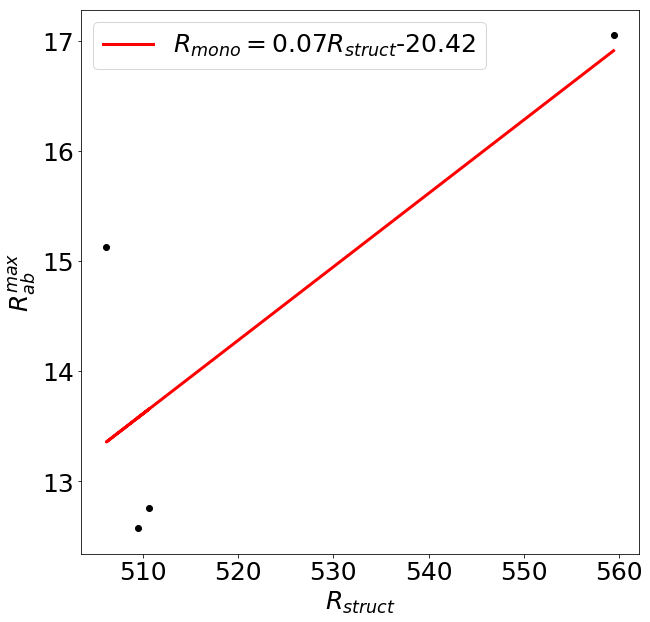

(9.494650748655825, 384.9649299908568, 0.7959143253211252, 0.2040856746788747, 5.106775228373973)


In [24]:
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(10,10))
plt.scatter(R_structs[:], R_maxs[:],c="k")    
z = np.polyfit(R_structs[:],R_maxs[:], 1)
p = np.poly1d(z)
plt.plot(R_structs[:],p(R_structs[:]),"r-", linewidth=3,label="$R_{mono} =$"+str(np.round(z[0], 2))+"$R_{struct}$" +  str(np.round(z[1],2)))
plt.ylabel("$R_{ab}^{max}$")
plt.xlabel("$R_{struct}$")
plt.legend()
plt.savefig(output_directory+"/ raw_"+master_name+"linearfit.svg")
plt.show()
plt.close()
slope, intercept, r_value, p_value, std_err = stats.linregress(R_maxs,R_structs,)
print(slope, intercept, r_value, p_value, std_err)

In [25]:
print(np.array([R_maxs[:],R_structs[:]]).T)

[[ 17.04783171 559.40981603]
 [ 15.12600395 506.19332193]
 [ 12.75666637 510.70198293]
 [ 12.57436795 509.54325595]]
